<a href="https://colab.research.google.com/github/YilBC/TalentoYB/blob/main/09_TIngestDataAPIWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se importan las librerias
import requests
import json
import pandas as pd

In [ ]:
# verificar la conexión con la API
import requests

api_key = 'd56833f6be008caa647305310856c81d'
ciudad = 'Bogotá'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}&units=metric'

response = requests.get(url)
print(f'Código de estado: {response.status_code}')
print(f'Respuesta: {response.text}')

Código de estado: 200
Respuesta: {"coord":{"lon":-74.0817,"lat":4.6097},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":21.73,"feels_like":21,"temp_min":21.73,"temp_max":21.73,"pressure":1011,"humidity":40,"sea_level":1011,"grnd_level":736},"visibility":10000,"wind":{"speed":7.2,"deg":130},"clouds":{"all":75},"dt":1729881656,"sys":{"type":1,"id":8582,"country":"CO","sunrise":1729852850,"sunset":1729895975},"timezone":-18000,"id":3688689,"name":"Bogota","cod":200}


In [ ]:
API_KEY = 'd56833f6be008caa647305310856c81d'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [ ]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 21.73°C


In [ ]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = 'd56833f6be008caa647305310856c81d'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

         Ciudad  Temperatura
0        Bogota        21.73
1      Medellin        29.43
2          Cali        32.00
3  Barranquilla        34.88
4     Cartagena        29.12
5        Cúcuta        34.97
6   Bucaramanga        26.73
7       Pereira        25.14
8   Santa Marta        32.16
9        Ibagué        26.95


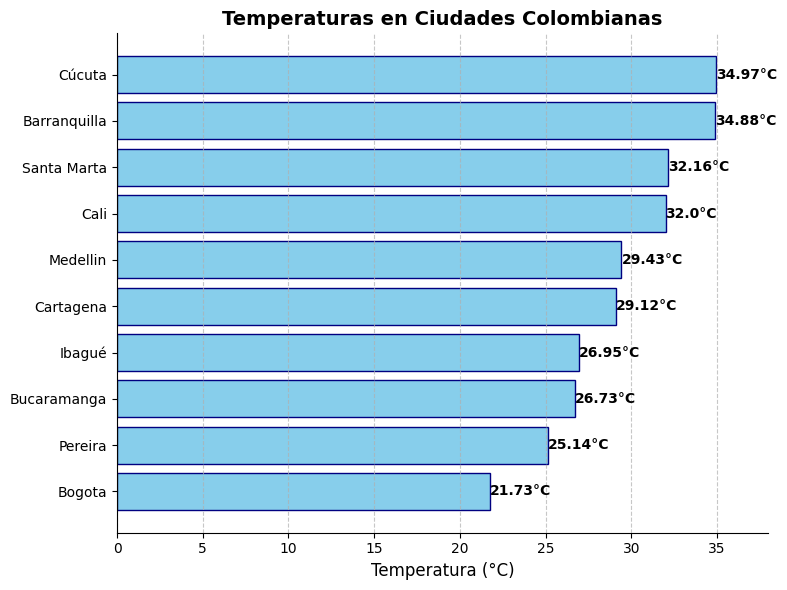

In [ ]:
import matplotlib.pyplot as plt

datos_temperatura_ordenados = sorted(datos_temperatura, key=lambda x: x['Temperatura'], reverse=False)

ciudades = [dato['Ciudad'] for dato in datos_temperatura_ordenados]
temperaturas = [dato['Temperatura'] for dato in datos_temperatura_ordenados]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(ciudades, temperaturas, color='skyblue', edgecolor='navy')

ax.set_xlabel('Temperatura (°C)', fontsize=12)
ax.set_title('Temperaturas en Ciudades Colombianas', fontsize=14, fontweight='bold')
ax.tick_params(axis='y', labelsize=10)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width}°C',
            ha='left', va='center', fontweight='bold', fontsize=10)

plt.xlim(0, max(temperaturas) + 3)

ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

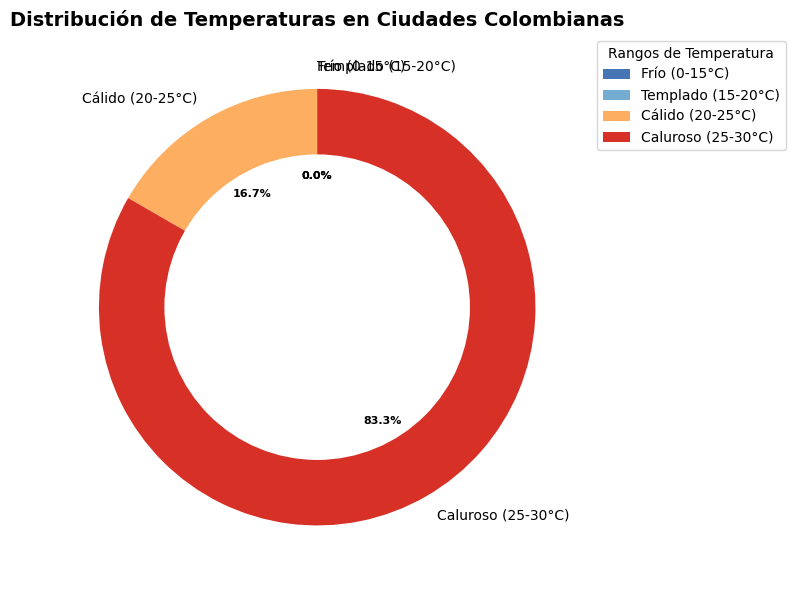

In [ ]:
# Gráfico de pastel de distribución de temperaturas en ciudades colombianas
temperaturas = [dato['Temperatura'] for dato in datos_temperatura]
rangos = [(0, 15), (15, 20), (20, 25), (25, 30)]
etiquetas = ['Frío (0-15°C)', 'Templado (15-20°C)', 'Cálido (20-25°C)', 'Caluroso (25-30°C)']

conteo = [sum(1 for temp in temperaturas if rango[0] <= temp < rango[1]) for rango in rangos]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(conteo, labels=etiquetas, autopct='%1.1f%%',
                                  startangle=90, colors=['#4575b4', '#74add1', '#fdae61', '#d73027'])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Distribución de Temperaturas en Ciudades Colombianas', fontsize=14, fontweight='bold')

ax.legend(wedges, etiquetas,
          title="Rangos de Temperatura",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.tight_layout()
plt.show()